In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gawn-ka-dataset/trainingData .csv


In [ ]:
village=pd.read_csv('/kaggle/input/gawn-ka-dataset/trainingData .csv')
village.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [ ]:
village.columns

Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount'],
      dtype='object')

In [ ]:
village.shape

(40000, 21)

In [ ]:
village.duplicated().sum()

0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Do a descriptive analysis of all the variables.

Gender Distribution:
     Count  Percentage
sex                   
F    37622       94.06
M     2371        5.93
TG       7        0.02


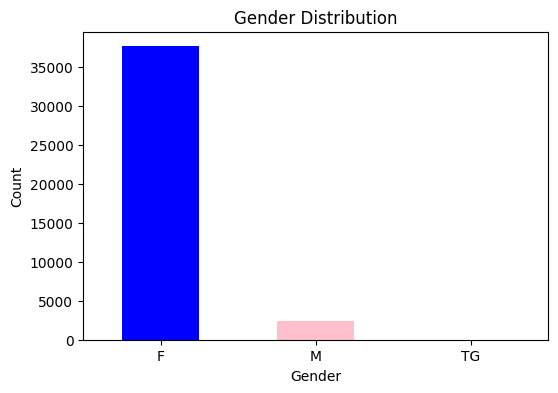

In [ ]:
# Gender Distribution with Count and Percentage
gender_counts = village['sex'].value_counts()
gender_percentage = (gender_counts / gender_counts.sum()) * 100
print("Gender Distribution:")
print(pd.DataFrame({'Count': gender_counts, 'Percentage': gender_percentage.round(2)}))
gender_counts.plot(kind='bar', color=['blue', 'pink'], figsize=(6, 4))
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Dropping the outliers with specific age values (205, 288, and 766105)
village = village[~village['age'].isin([205, 288, 766105])]

# Verify the cleaning
print(village.shape)  # Check the shape of the cleaned dataset


(39997, 21)


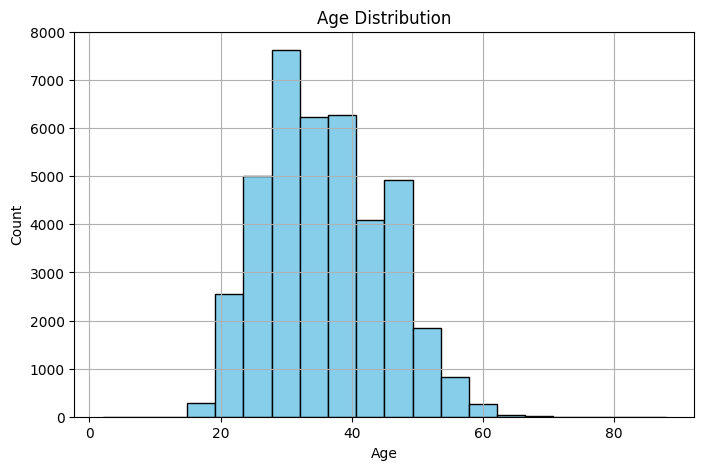

In [ ]:
import matplotlib.pyplot as plt

# Plotting the count of age
plt.figure(figsize=(8, 5))
plt.hist(village['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()




In [ ]:
village['city'] = village['city'].replace({'PUSAD': 'Pusad'})


In [ ]:
unique_city_count = village['city'].nunique()
print(f"Unique city count: {unique_city_count}")


Unique city count: 855


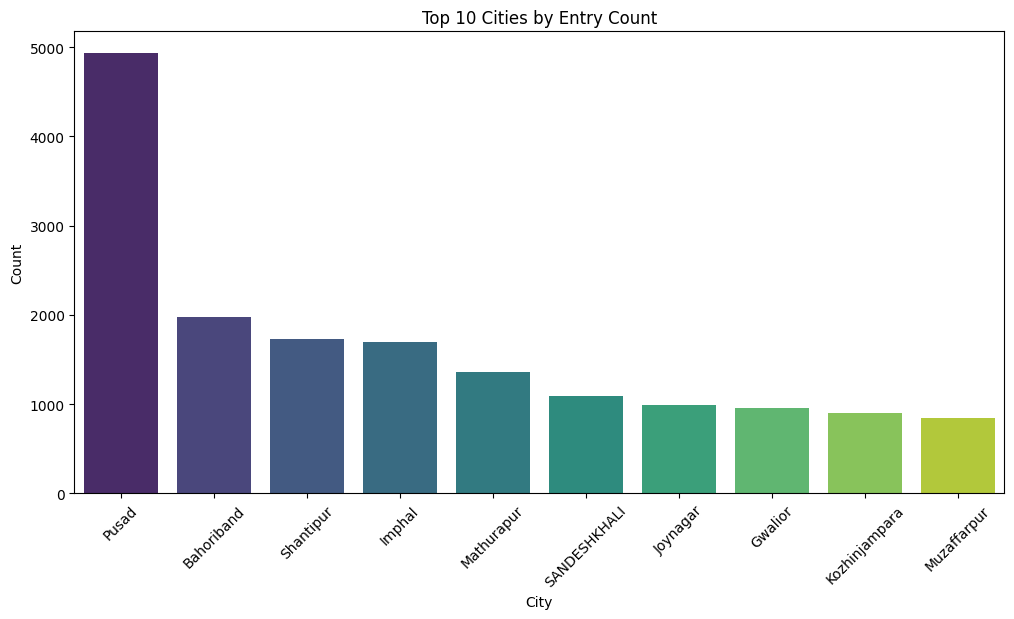

In [ ]:
# Count the number of entries per city and select the top 10 cities
top_cities = village['city'].value_counts().nlargest(10)

# Plotting the top 10 cities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cities by Entry Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


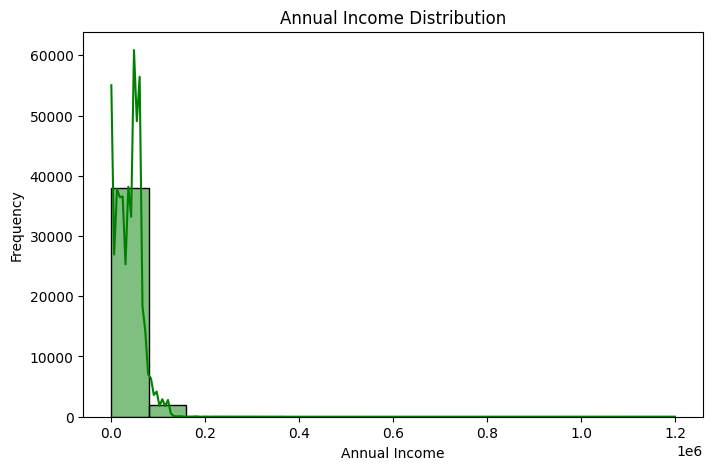


Annual Income Summary:
count    4.000000e+04
mean     3.764021e+04
std      2.873912e+04
min      0.000000e+00
25%      1.440000e+04
50%      3.600000e+04
75%      5.600000e+04
max      1.200000e+06
Name: annual_income, dtype: float64


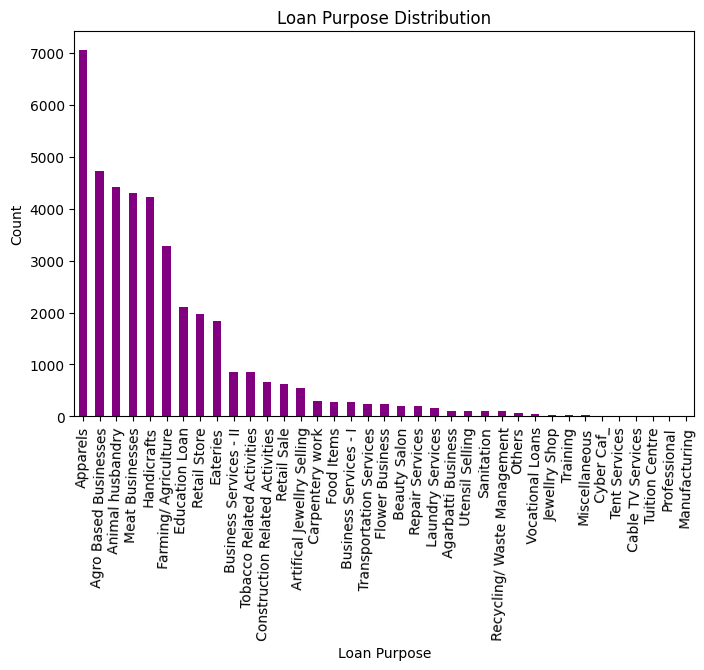


Loan Purpose Distribution:
                                 Count  Percentage
loan_purpose                                      
Apparels                          7064       17.67
Agro Based Businesses             4729       11.83
Animal husbandry                  4421       11.06
Meat Businesses                   4302       10.76
Handicrafts                       4230       10.58
Farming/ Agriculture              3284        8.22
Education Loan                    2100        5.25
Retail Store                      1963        4.91
Eateries                          1831        4.58
Business Services - II             854        2.14
Tobacco Related Activities         853        2.13
Construction Related Activities    661        1.65
Retail Sale                        614        1.54
Artifical Jewellry Selling         556        1.39
Carpentery work                    299        0.75
Food Items                         285        0.71
Business Services - I              276        0.69
Tra

In [ ]:
# Income Distribution
plt.figure(figsize=(8, 5))
sns.histplot(village['annual_income'], bins=15, kde=True, color='green')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

# Income Summary
income_summary = village['annual_income'].describe()
print("\nAnnual Income Summary:")
print(income_summary)

# Loan Purpose Distribution
loan_purpose_counts = village['loan_purpose'].value_counts()
loan_purpose_percentages = (loan_purpose_counts / loan_purpose_counts.sum()) * 100

# Plotting
plt.figure(figsize=(8, 5))
loan_purpose_counts.plot(kind='bar', color='purple')
plt.title("Loan Purpose Distribution")
plt.xlabel("Loan Purpose")
plt.ylabel("Count")
plt.xticks(rotation=88)
plt.show()

# Display Counts and Percentages
print("\nLoan Purpose Distribution:")
print(pd.DataFrame({'Count': loan_purpose_counts, 'Percentage': loan_purpose_percentages.round(2)}))


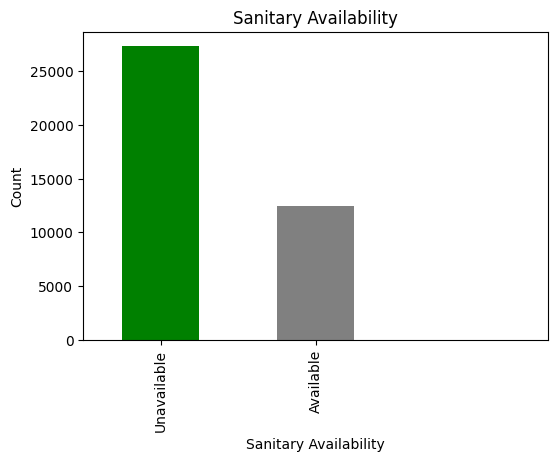


Sanitary Availability Distribution:
                       Count  Percentage
sanitary_availability                   
 1.0                   27313       68.64
 0.0                   12478       31.36
-1.0                       1        0.00


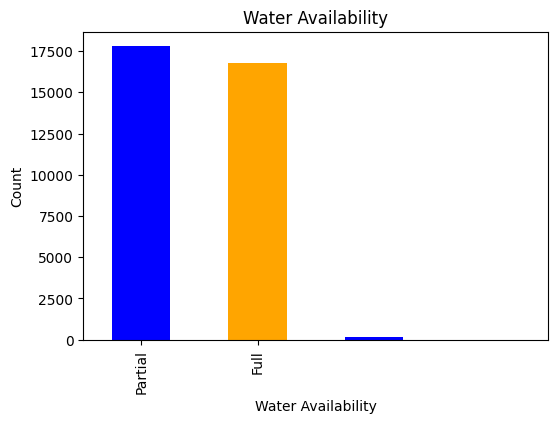


Water Availability Distribution:
                  Count  Percentage
water_availabity                   
 1.0              17782       51.18
 0.5              16782       48.30
 0.0                182        0.52
-1.0                  1        0.00


In [ ]:
# Sanitary Availability
sanitary_counts = village['sanitary_availability'].value_counts()
sanitary_percentages = (sanitary_counts / sanitary_counts.sum()) * 100

# Plotting
plt.figure(figsize=(6, 4))
sanitary_counts.plot(kind='bar', color=['green', 'gray'])
plt.title("Sanitary Availability")
plt.xlabel("Sanitary Availability")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Unavailable', 'Available'])
plt.show()

# Display Counts and Percentages
print("\nSanitary Availability Distribution:")
print(pd.DataFrame({'Count': sanitary_counts, 'Percentage': sanitary_percentages.round(2)}))

# Water Availability
water_counts = village['water_availabity'].value_counts()
water_percentages = (water_counts / water_counts.sum()) * 100

# Plotting
plt.figure(figsize=(6, 4))
water_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Water Availability")
plt.xlabel("Water Availability")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Partial', 'Full'])
plt.show()

# Display Counts and Percentages
print("\nWater Availability Distribution:")
print(pd.DataFrame({'Count': water_counts, 'Percentage': water_percentages.round(2)}))


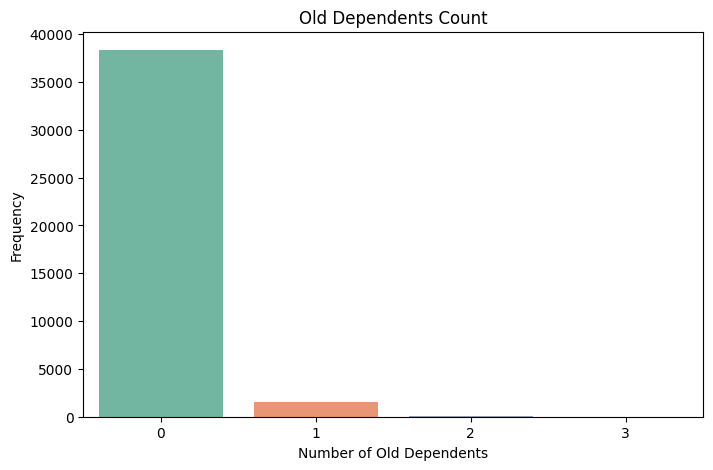


Old Dependents Distribution:
                Count  Percentage
old_dependents                   
0               38331       95.83
1                1543        3.86
2                 125        0.31
3                   1        0.00


In [ ]:
import seaborn as sns

# Old Dependents Distribution
dependents_counts = village['old_dependents'].value_counts()
dependents_percentages = (dependents_counts / dependents_counts.sum()) * 100

# Plotting with seaborn's Set2 colormap
plt.figure(figsize=(8, 5))
sns.barplot(x=dependents_counts.index, y=dependents_counts.values, palette='Set2')
plt.title("Old Dependents Count")
plt.xlabel("Number of Old Dependents")
plt.ylabel("Frequency")
plt.show()

# Display Counts and Percentages
print("\nOld Dependents Distribution:")
print(pd.DataFrame({'Count': dependents_counts, 'Percentage': dependents_percentages.round(2)}))


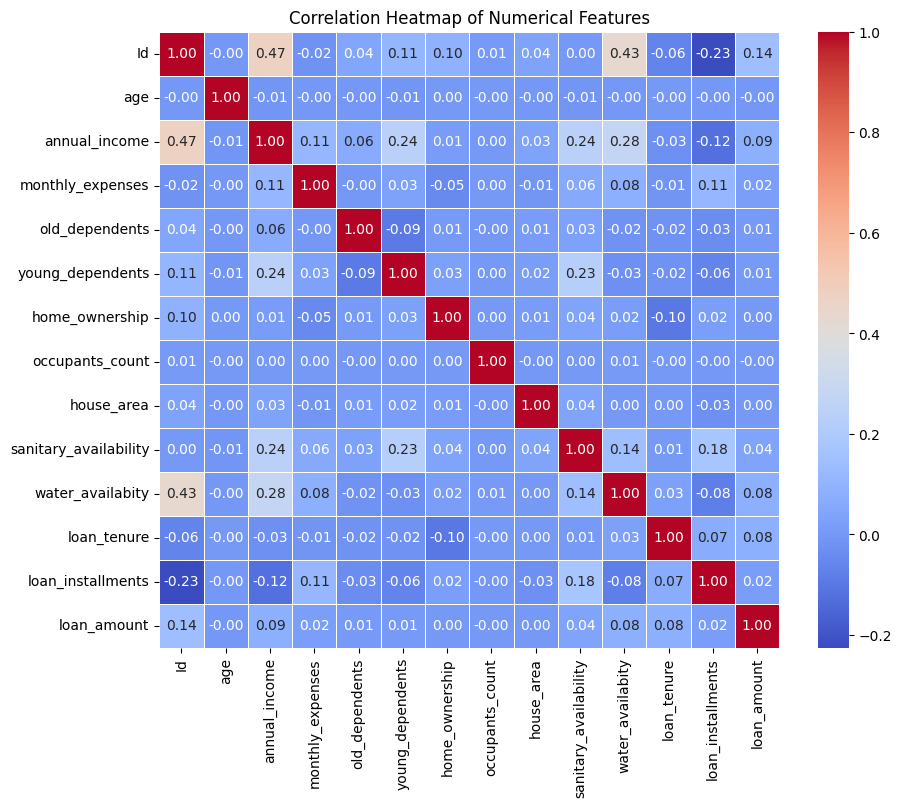

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 1. Correlation heatmap for numerical columns
numerical_cols = village.select_dtypes(include=[np.number]).columns
corr_matrix = village[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()








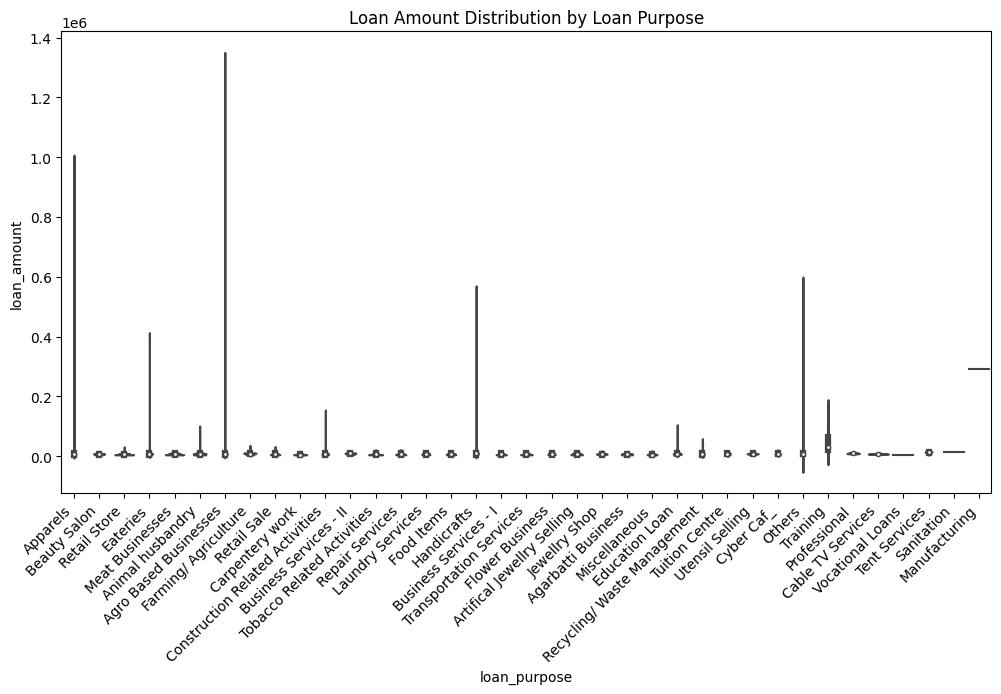

In [ ]:
# 5. Violin plot for 'loan_amount' by 'loan_purpose'
plt.figure(figsize=(12, 6))
sns.violinplot(data=village, x='loan_purpose', y='loan_amount')
plt.title('Loan Amount Distribution by Loan Purpose')
plt.xticks(rotation=45, ha='right')
plt.show()


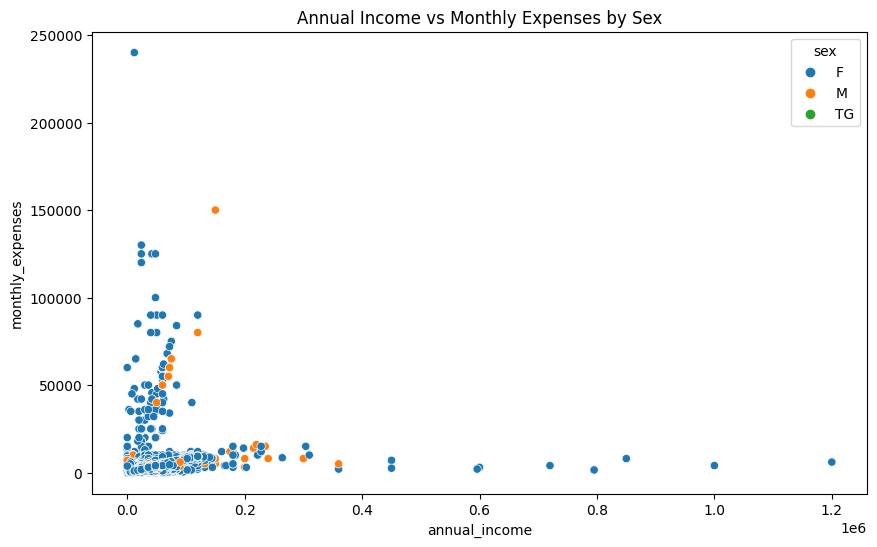

In [ ]:
# 6. Scatter plot for numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=village, x='annual_income', y='monthly_expenses', hue='sex')
plt.title('Annual Income vs Monthly Expenses by Sex')
plt.show()


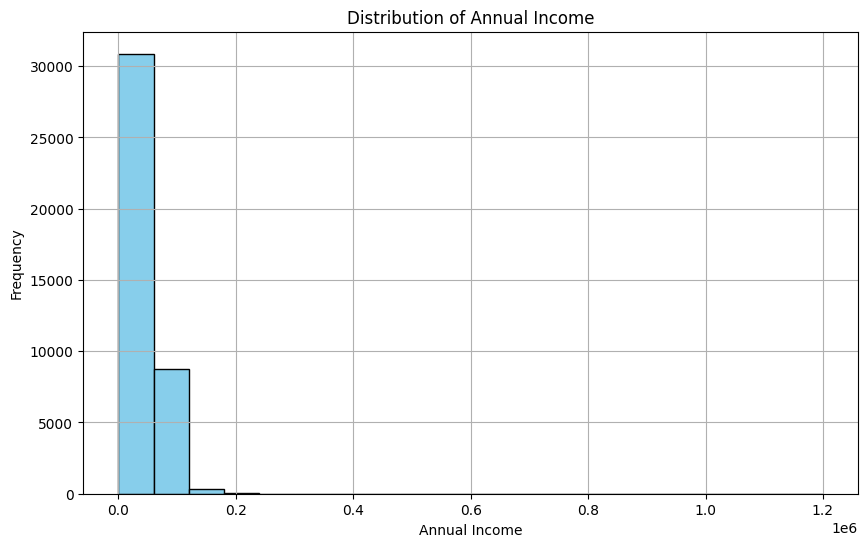

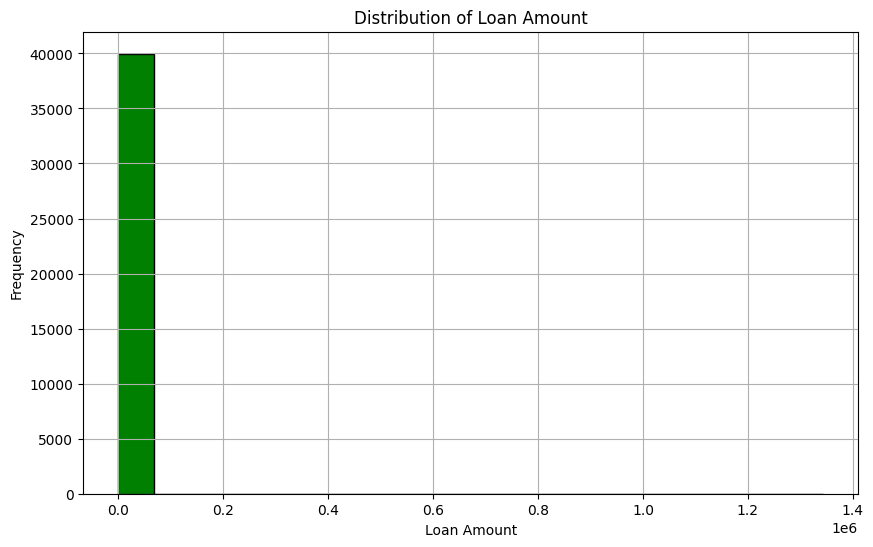

In [ ]:
# 7. Histogram for the distribution of numerical columns
plt.figure(figsize=(10, 6))
village['annual_income'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
village['loan_amount'].hist(bins=20, color='green', edgecolor='black')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()



Id                          0
city                     1864
age                         0
sex                         0
social_class             5252
primary_business           26
secondary_business       5238
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5250
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64


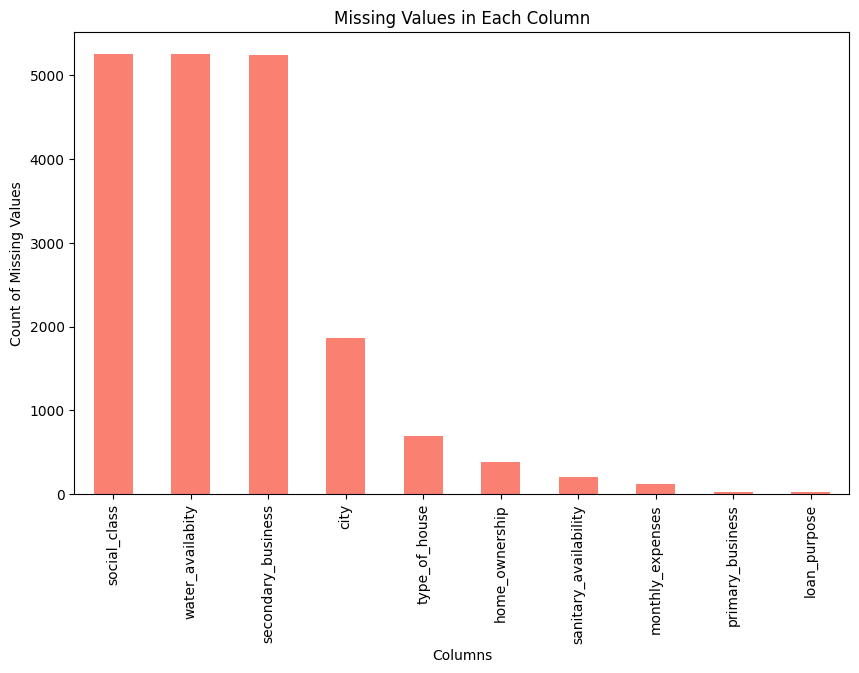

In [ ]:
missing_values = village.isnull().sum()
print(missing_values[missing_values >= 0])

# Plot missing values
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Missing Values in Each Column')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.show()

In [ ]:
# Basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
village.describe()



Basic Statistics for Numerical Columns:


,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,39997.000000,39997.000000,3.999700e+04,39877.000000,39997.000000,39997.000000,39618.000000,39997.000000,39997.000000,39789.000000,34747.000000,39997.000000,39997.000000,3.999700e+04
mean,20001.210866,35.997650,3.764304e+04,3810.963989,0.044903,1.137185,0.972487,26.642998,552.846213,0.686421,0.753216,12.032227,21.760957,8.412836e+03
std,11547.287073,8.926537,2.873835e+04,4593.107390,0.222011,1.073835,0.163574,4750.173619,4597.091810,0.464007,0.255337,1.367525,16.682343,1.359741e+04
min,1.000000,2.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10001.000000,29.000000,1.440000e+04,2500.000000,0.000000,0.000000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20002.000000,35.000000,3.600000e+04,3500.000000,0.000000,1.000000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30001.000000,42.000000,5.600000e+04,4000.000000,0.000000,2.000000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.000000,88.000000,1.200000e+06,240000.000000,3.000000,7.000000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


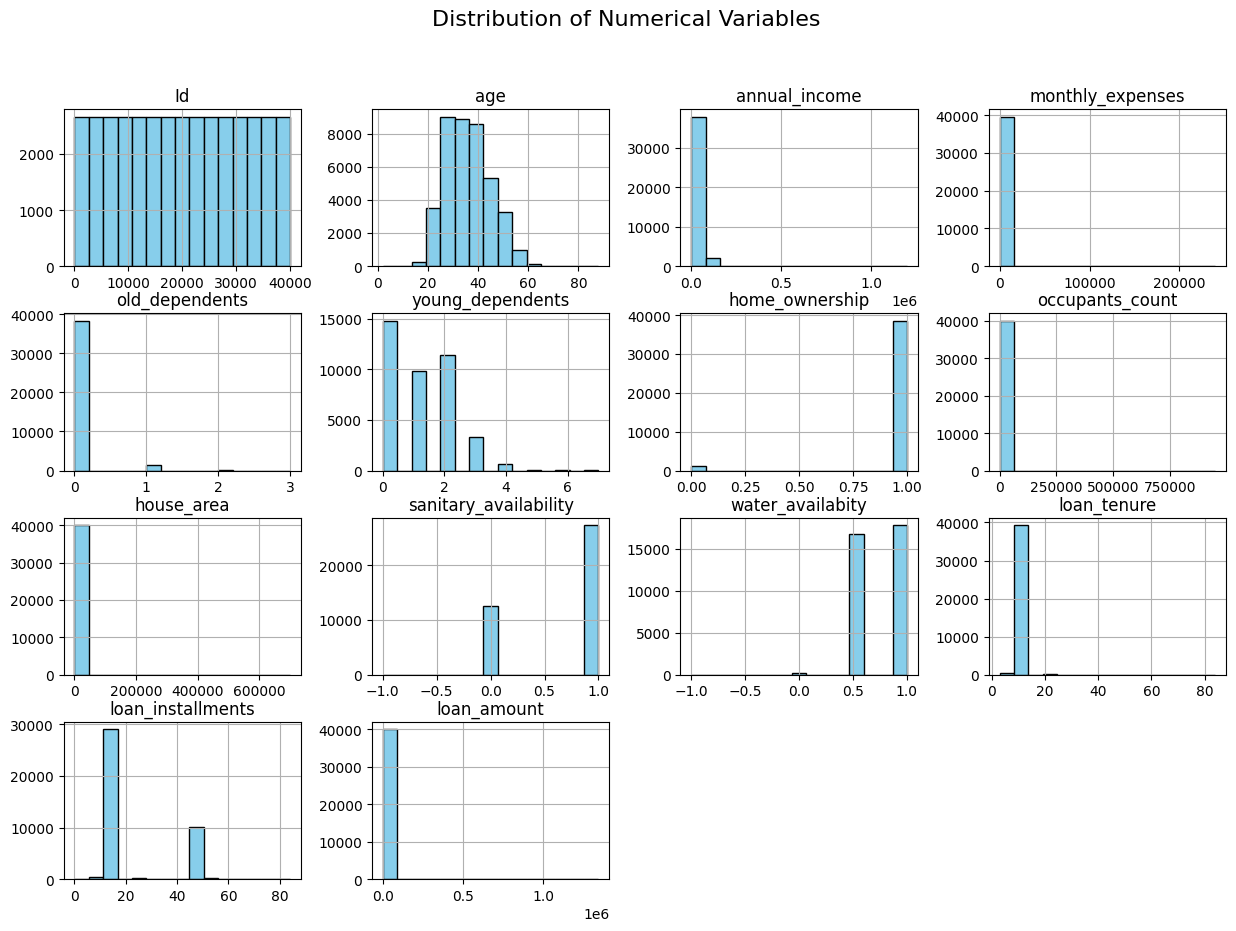

In [ ]:
# Distribution of numerical variables
numerical_cols = village.select_dtypes(include=[np.number]).columns
village[numerical_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', size=16)
plt.show()

# Handling Missing value

In [ ]:
# Handle missing values
# For numerical columns, impute missing values with median
numerical_columns = ['age', 'annual_income', 'monthly_expenses', 'old_dependents', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_tenure', 'loan_installments', 'loan_amount']
village[numerical_columns] = village[numerical_columns].fillna(village[numerical_columns].median())

# For categorical columns, impute| missing values with the mode (most frequent category)
categorical_columns = ['city', 'sex', 'social_class', 'primary_business', 'secondary_business', 'home_ownership', 'loan_purpose', 'type_of_house']
village[categorical_columns] = village[categorical_columns].fillna(village[categorical_columns].mode().iloc[0])

# Check again for missing values
print(village.isnull().sum())


Id                       0
city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64


Outliers based on combined IQR and Z-score method:
          Id             city  age sex social_class    primary_business  \
1          2         Manjapra   21   F          OBC           Tailoring   
12        13            Pusad   34   F          OBC           Tailoring   
19        20            Pusad   48   F          OBC  Banana Cultivation   
23        24          Dhanbad   43   M         Teli       General store   
28        29          Nuapada   41   F          OBC    Vegetable vendor   
...      ...              ...  ...  ..          ...                 ...   
39982  39983  KODANGAL MANDAL   35   F           OC    Gram cultivation   
39983  39984  KODANGAL MANDAL   58   F           OC    Gram cultivation   
39984  39985            Pusad   20   F      General      Education Loan   
39986  39987        Anupshahr   19   F      General      Education Loan   
39987  39988  KODANGAL MANDAL   40   F           BC    Gram cultivation   

        secondary_business  annual_income  month

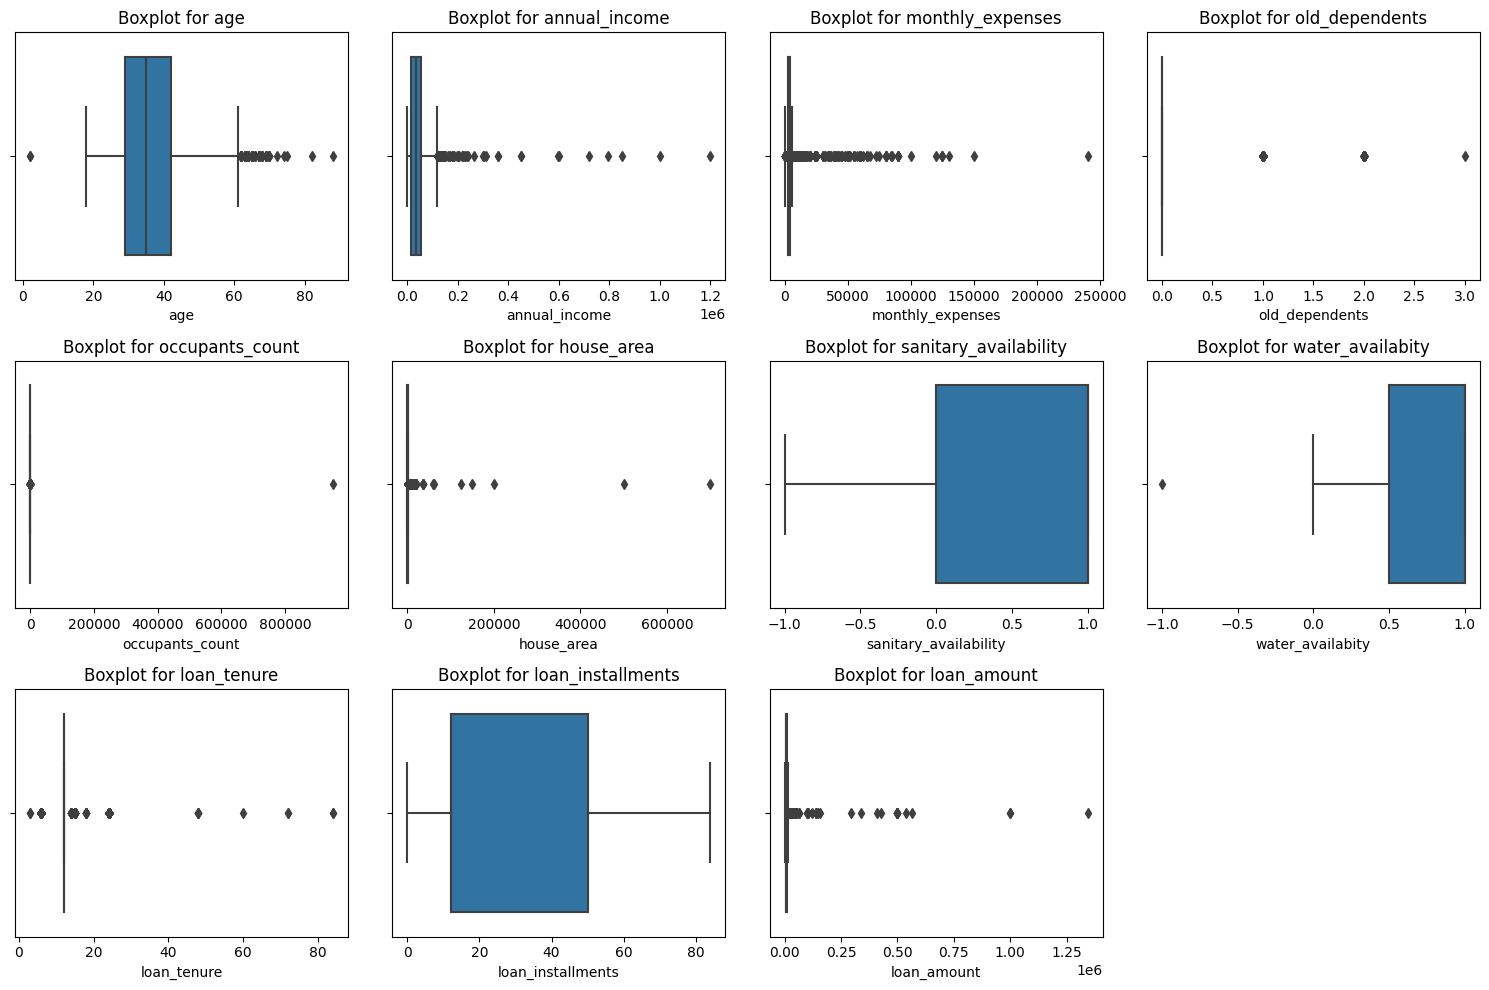

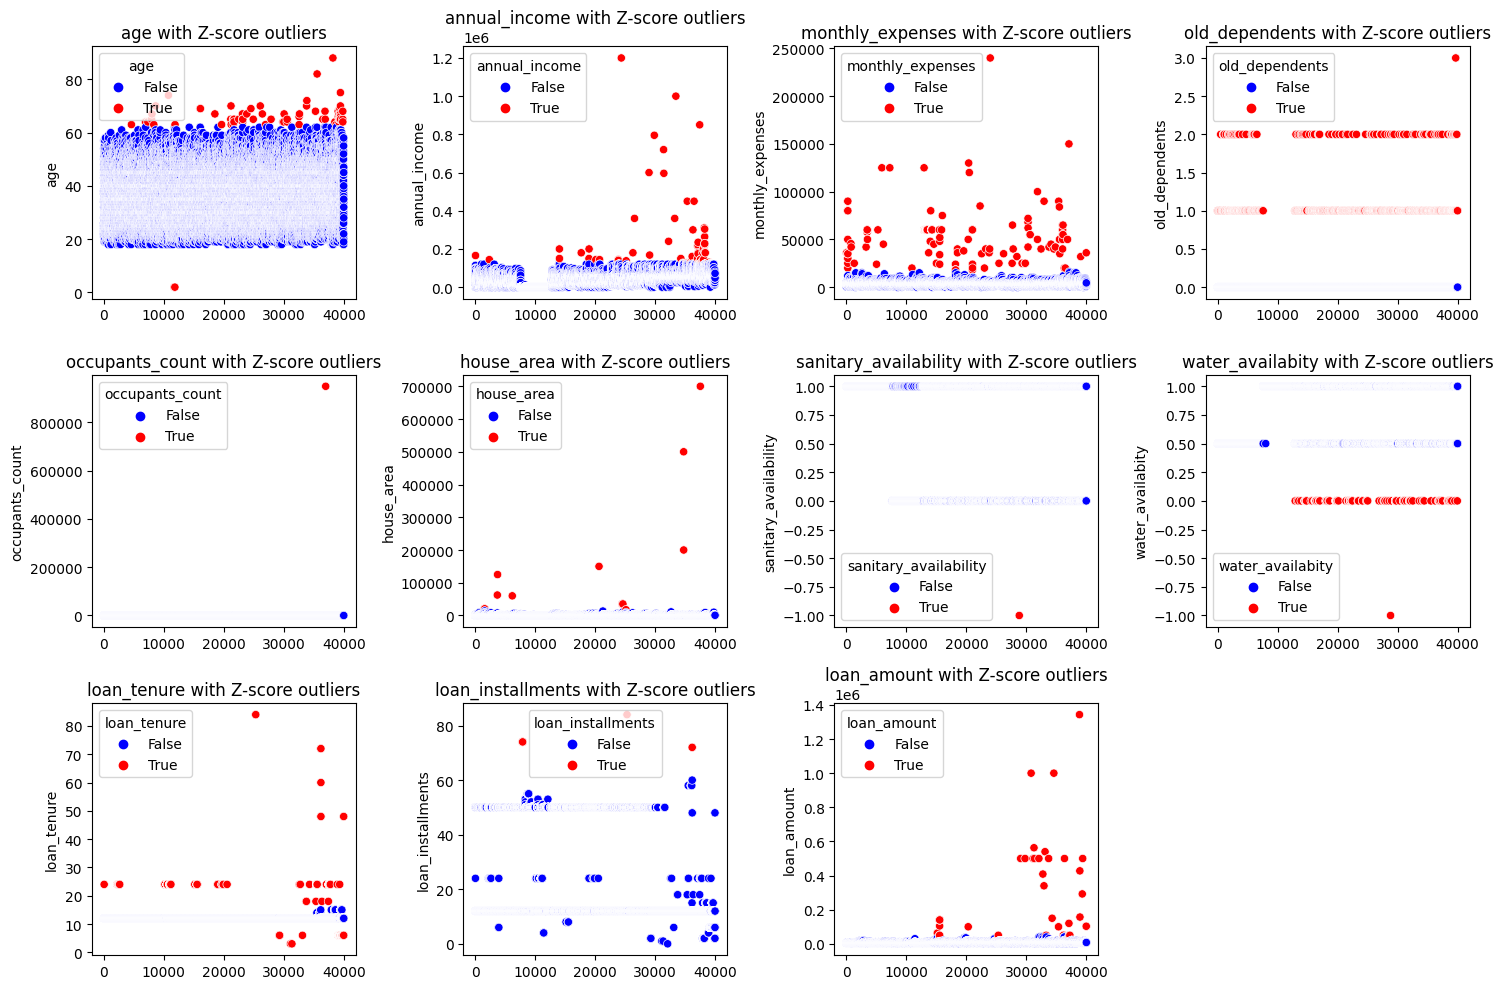

In [ ]:
from scipy.stats import zscore

# Step 2: IQR Method for Outlier Detection
Q1 = village[numerical_columns].quantile(0.25)
Q3 = village[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier condition based on IQR
outliers_iqr = ((village[numerical_columns] < (Q1 - 1.5 * IQR)) | (village[numerical_columns] > (Q3 + 1.5 * IQR)))

# Step 3: Z-score Method for Outlier Detection
# Calculate Z-scores for numerical columns
village_zscore = village[numerical_columns].apply(zscore)

# Define outlier based on Z-score (typically, Z > 3 or Z < -3)
outliers_zscore = (village_zscore > 3) | (village_zscore < -3)

# Step 4: Combine Both Methods
# Identify outliers in both IQR and Z-score methods
outliers_combined = outliers_iqr | outliers_zscore

# Mark rows as outliers where any column has outliers (True)
outlier_rows_combined = village[outliers_combined.any(axis=1)]

# Display the outliers detected using combined methods
print("Outliers based on combined IQR and Z-score method:")
print(outlier_rows_combined)

# Step 5: Remove the Outliers
# Remove rows that are detected as outliers using either IQR or Z-score methods
village_cleaned = village[~outliers_combined.any(axis=1)]

# Display the shape of the cleaned dataset
print("Shape of the cleaned dataset:")
print(village_cleaned.shape)

# Visualizing the Outliers (same as before, you can remove if not needed)
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot visualization of outliers for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=village[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

# Scatter plot visualization of Z-score based outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=village.index, y=village[col], hue=outliers_zscore[col], palette={True: 'red', False: 'blue'})
    plt.title(f'{col} with Z-score outliers')
plt.tight_layout()
plt.show()


In [ ]:
village.shape

(40000, 21)

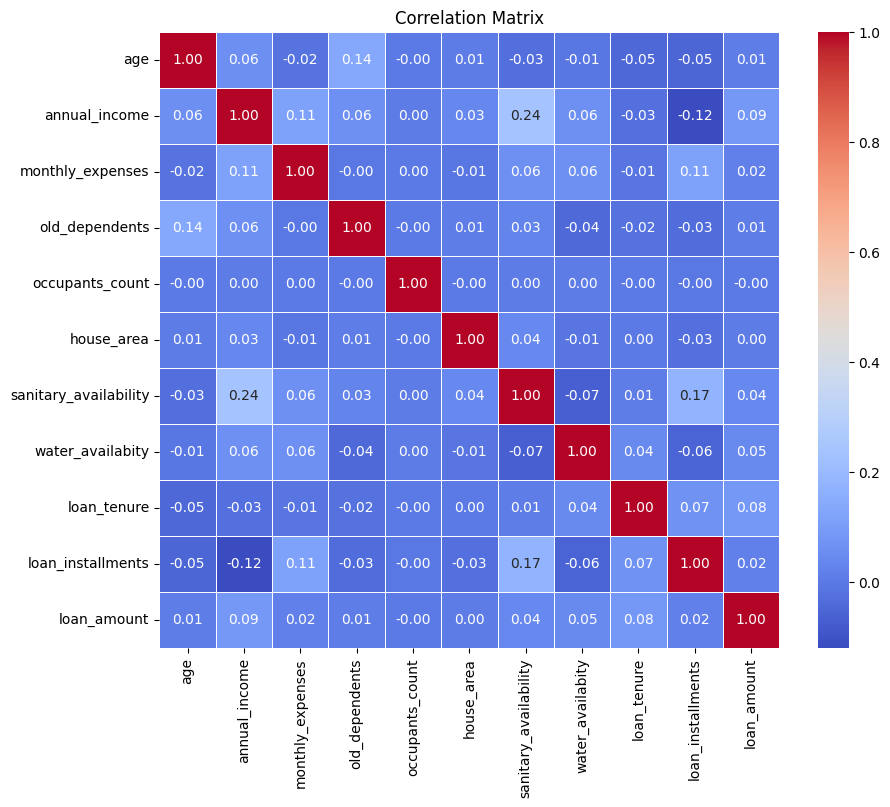

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns
corr = village[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


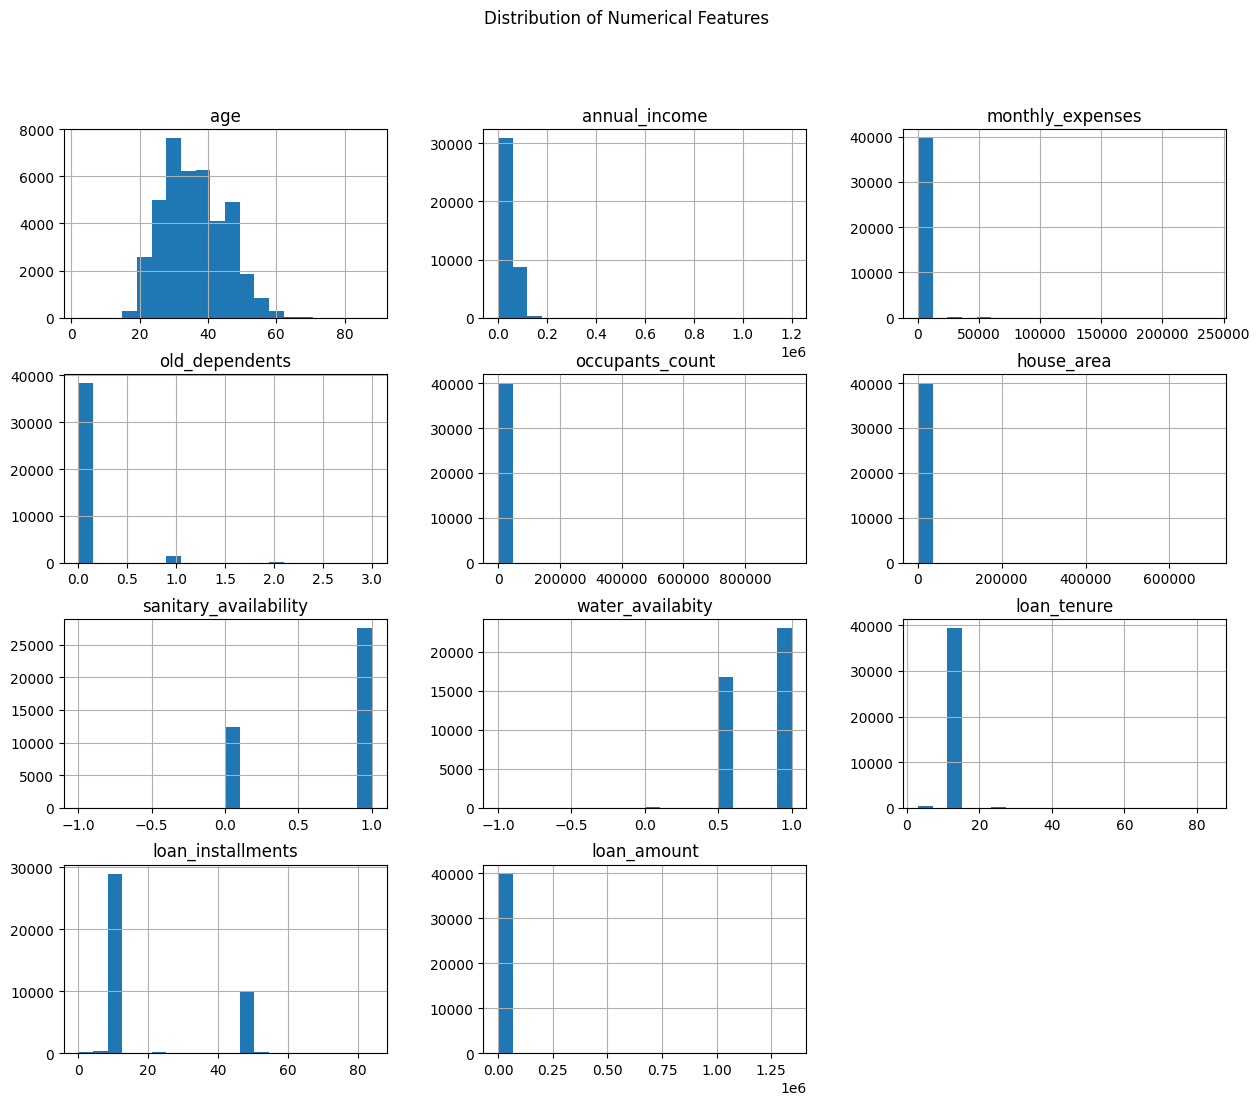

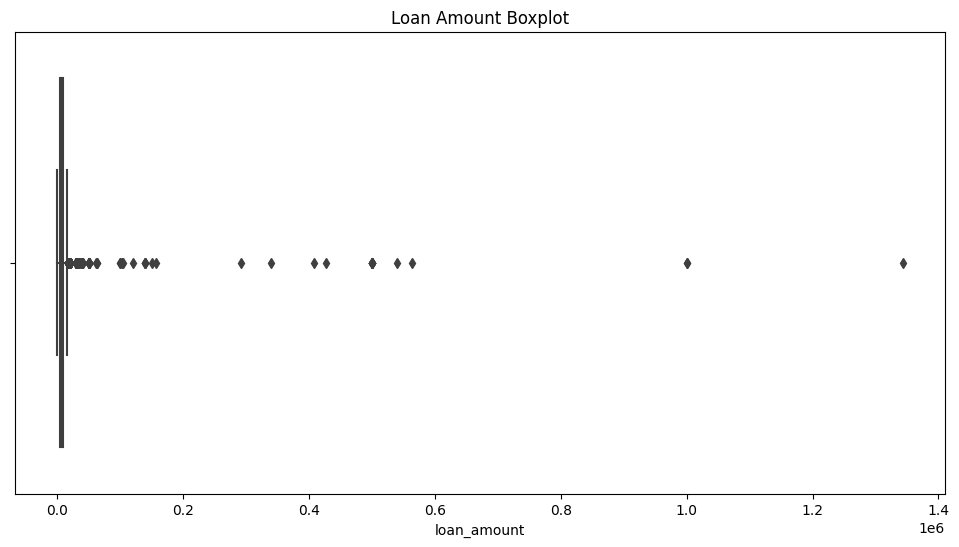

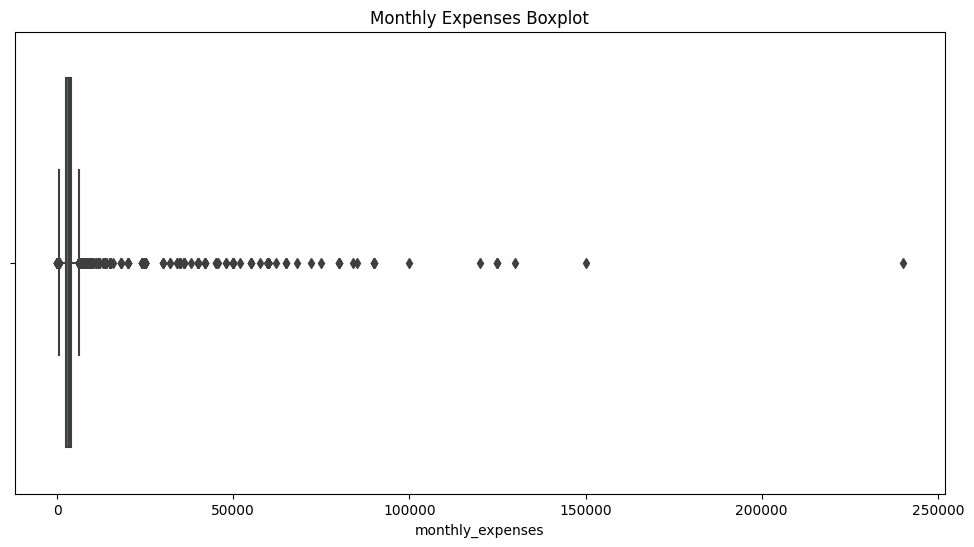

In [ ]:
# Distribution of numerical features
village[numerical_columns].hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplot for loan amount and monthly expenses
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_amount', data=village)
plt.title('Loan Amount Boxplot')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='monthly_expenses', data=village)
plt.title('Monthly Expenses Boxplot')
plt.show()


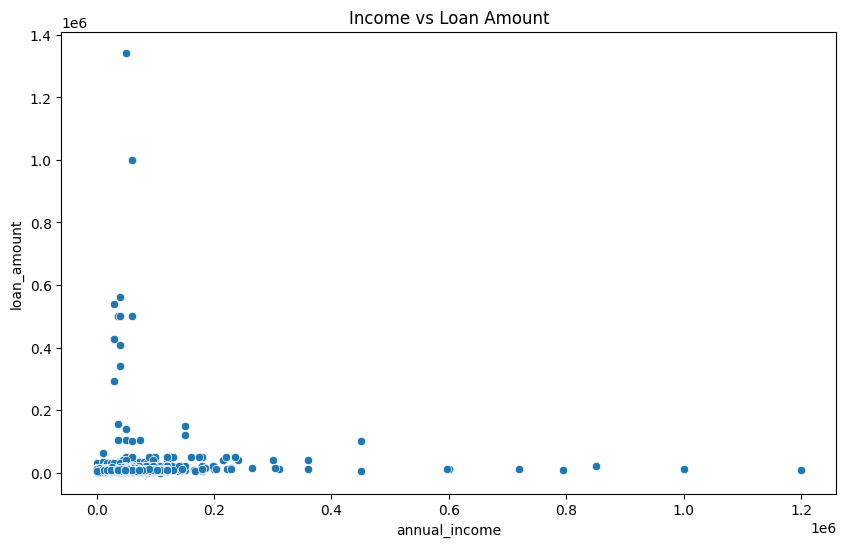

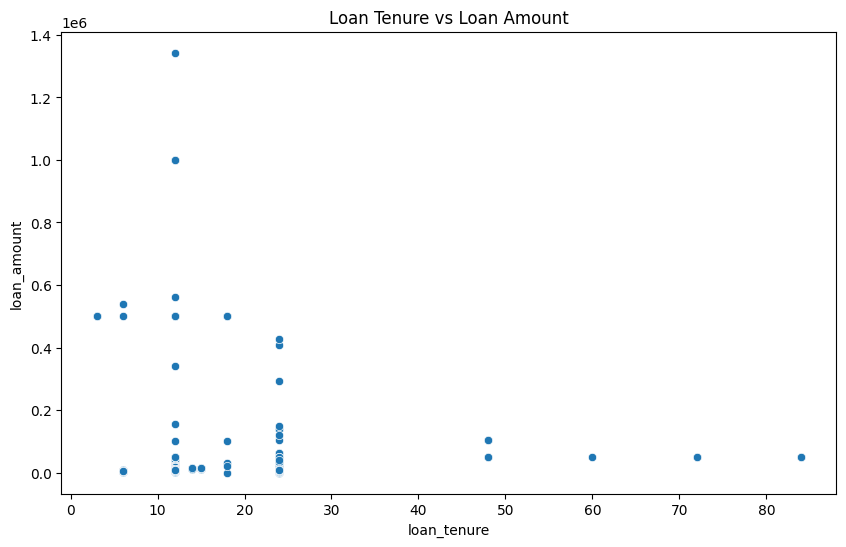

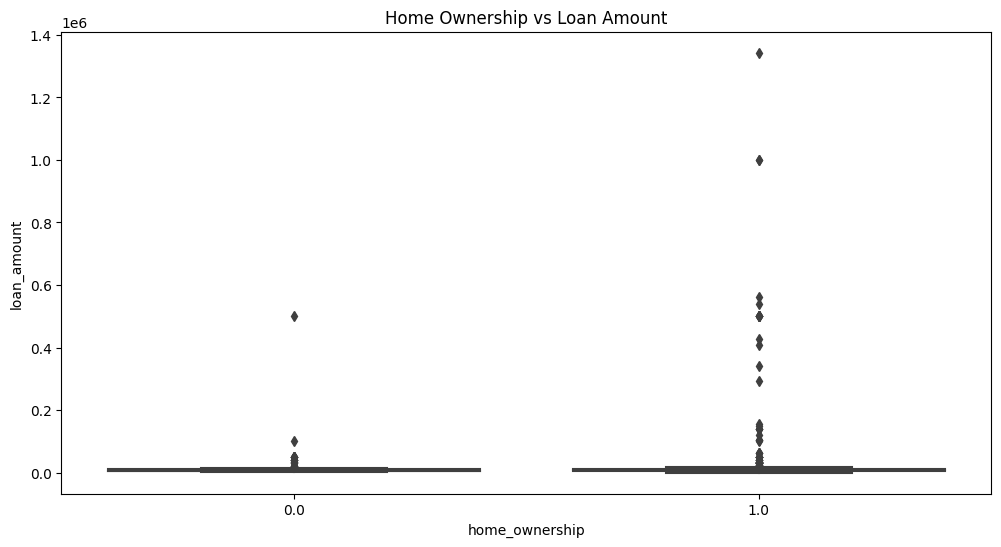

In [ ]:
# Income vs. Loan Amount (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='loan_amount', data=village)
plt.title('Income vs Loan Amount')
plt.show()

# Loan Amount vs Loan Tenure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_tenure', y='loan_amount', data=village)
plt.title('Loan Tenure vs Loan Amount')
plt.show()

# Home Ownership vs Loan Amount (Categorical vs Numerical)
plt.figure(figsize=(12, 6))
sns.boxplot(x='home_ownership', y='loan_amount', data=village)
plt.title('Home Ownership vs Loan Amount')
plt.show()


In [ ]:
village.columns

Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount', 'income_expense_ratio', 'debt_to_income_ratio',
       'dependents_per_income', 'savings_to_income_ratio',
       'loan_to_expense_ratio', 'loan_tenure_to_income_ratio',
       'age_to_loan_amount_ratio', 'occupants_per_house_area',
       'house_area_to_income_ratio', 'sanitary_water_to_income_ratio'],
      dtype='object')

In [ ]:
village.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [ ]:
# Derived metrics for creditworthiness
village['DTI'] = village.apply(
    lambda x: (x['loan_installments'] * 12) / x['annual_income'] if x['annual_income'] > 0 else None, axis=1
)
village['Disposable_Income'] = village['annual_income'] - (village['monthly_expenses'] * 12)
village['Dependents'] = village['old_dependents'] + village['young_dependents']
village['Dependent_Ratio'] = village.apply(
    lambda x: x['Dependents'] / x['annual_income'] if x['annual_income'] > 0 else None, axis=1
)
village['LTV'] = village.apply(
    lambda x: x['loan_amount'] / x['house_area'] if x['home_ownership'] == 1 and x['house_area'] > 0 else None, axis=1
)

# Initialize creditworthiness score
village['creditworthy'] = 0

# Rule 1: Debt-to-Income Ratio (DTI)
village.loc[village['DTI'] < 0.4, 'creditworthy'] += 1

# Rule 2: Disposable Income After Monthly Expenses
village.loc[village['Disposable_Income'] > village['loan_amount'], 'creditworthy'] += 1

# Rule 3: Dependents Ratio
village.loc[village['Dependent_Ratio'] < 0.5, 'creditworthy'] += 1

# Rule 4: Loan-to-Value Ratio (LTV)
village.loc[village['LTV'] < 0.8, 'creditworthy'] += 1

# Rule 5: Sanitary and Water Availability
village.loc[(village['sanitary_availability'] == 1) & (village['water_availabity'] == 1), 'creditworthy'] += 1

# Rule 6: Loan Tenure
village.loc[village['loan_tenure'] <= 24, 'creditworthy'] += 1

# Rule 7: Social Class
village.loc[village['social_class'] == 'A', 'creditworthy'] += 1

# Define creditworthy status based on threshold (e.g., score >= 4)
village['creditworthy'] = village['creditworthy'].apply(lambda x: 1 if x >= 4 else 0)

# Save the updated dataset with creditworthiness
village.to_csv("village_creditworthy.csv", index=False)

# View a sample of the dataset
print(village[['Id', 'creditworthy']].head())


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


   Id  creditworthy
0   1             0
1   2             1
2   3             0
3   4             0
4   5             0


In [ ]:
village.columns

Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount', 'DTI', 'Disposable_Income', 'Dependents',
       'Dependent_Ratio', 'LTV', 'creditworthy'],
      dtype='object')

In [ ]:
# Calculate the count of creditworthiness
creditworthy_count = village['creditworthy'].value_counts()

# Print the counts
print("Count of Creditworthiness:")
print(creditworthy_count)


Count of Creditworthiness:
creditworthy
1    22873
0    17124
Name: count, dtype: int64


   Id       DTI  Disposable_Income  Dependent_Ratio         LTV  creditworthy
0   1  0.004000           -24000.0         0.000056   71.428571             0
1   2  0.006383            50800.0         0.000021   93.750000             1
2   3  0.003000                0.0         0.000042  100.000000             0
3   4  0.085714           -53000.0         0.000286  150.000000             0
4   5  0.004000            -6000.0         0.000000   44.642857             0
34289
15482
22873
17124


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


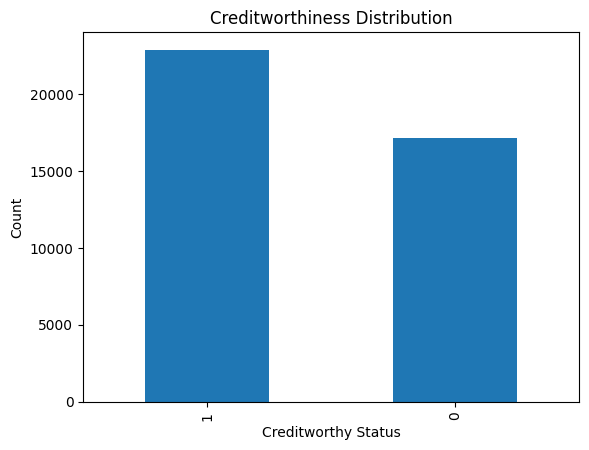

In [ ]:
print(village[['Id', 'DTI', 'Disposable_Income', 'Dependent_Ratio', 'LTV', 'creditworthy']].head())
print(village[village['DTI'] < 0.4].shape[0])  # Count rows satisfying DTI < 0.4

print(village[village['Disposable_Income'] > village['loan_amount']].shape[0])
print(village[village['creditworthy'] == 1].shape[0])  # Count creditworthy rows
print(village[village['creditworthy'] == 0].shape[0])  # Count not creditworthy rows
import matplotlib.pyplot as plt

village['creditworthy'].value_counts().plot(kind='bar')
plt.title("Creditworthiness Distribution")
plt.xlabel("Creditworthy Status")
plt.ylabel("Count")
plt.show()

In [ ]:
# Drop 'Id' column and separate features and target
X = village.drop(columns=['Id', 'creditworthy'])  # Drop 'Id' and target columns
y = village['creditworthy']                      # Target column
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

print(f"Shape of X after encoding: {X.shape}")
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Shape of X after encoding: (39997, 1879)
Training data shape: (31997, 1879)
Testing data shape: (8000, 1879)


In [ ]:
# Correctly fill missing values for DTI, Dependent_Ratio, and LTV
village['DTI'] = village['DTI'].fillna(village['DTI'].median())
village['Dependent_Ratio'] = village['Dependent_Ratio'].fillna(village['Dependent_Ratio'].median())
village['LTV'] = village['LTV'].fillna(village['LTV'].median())


In [ ]:
village.loc[village['Disposable_Income'] < 0, 'creditworthy'] = 0


In [ ]:
village['LTV'] = village['LTV'].apply(lambda x: x if x <= 1 else 1)


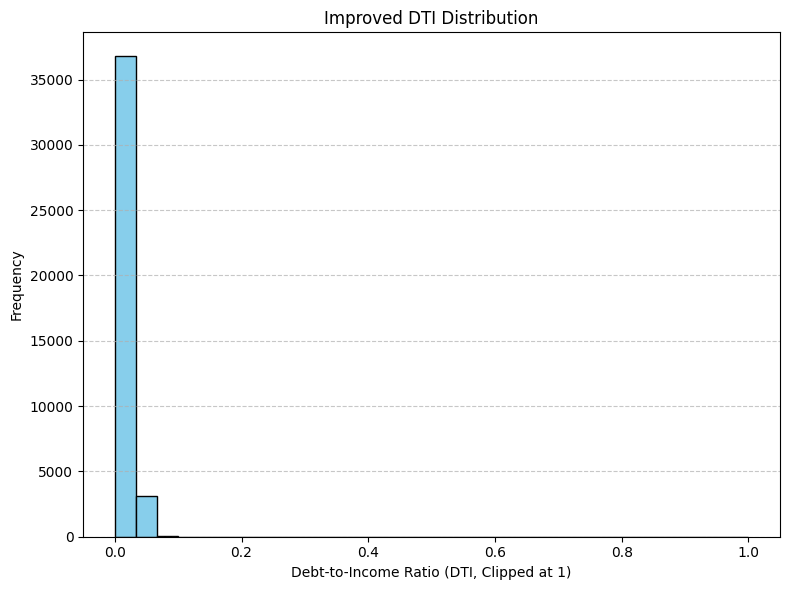

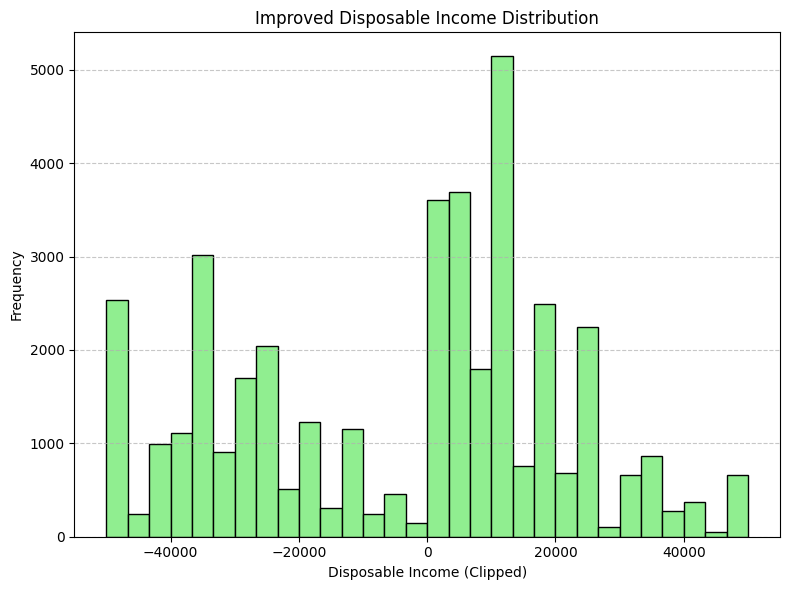

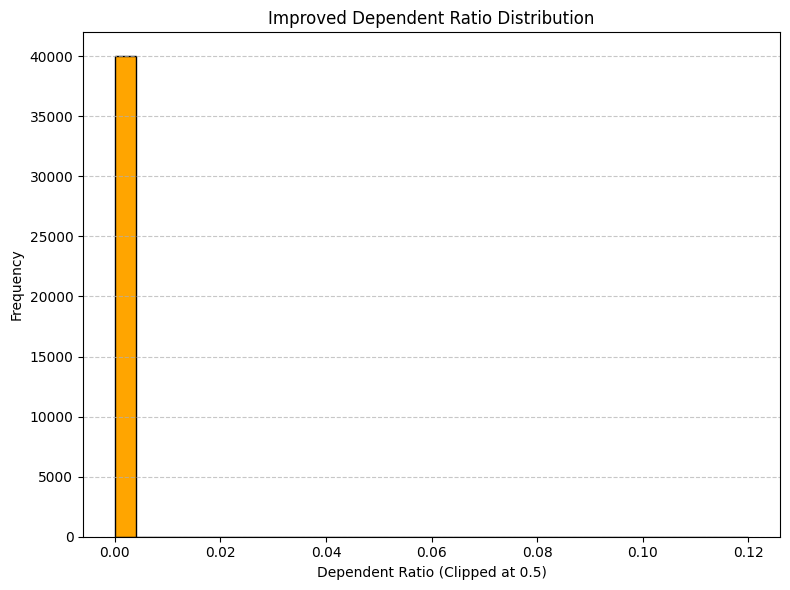

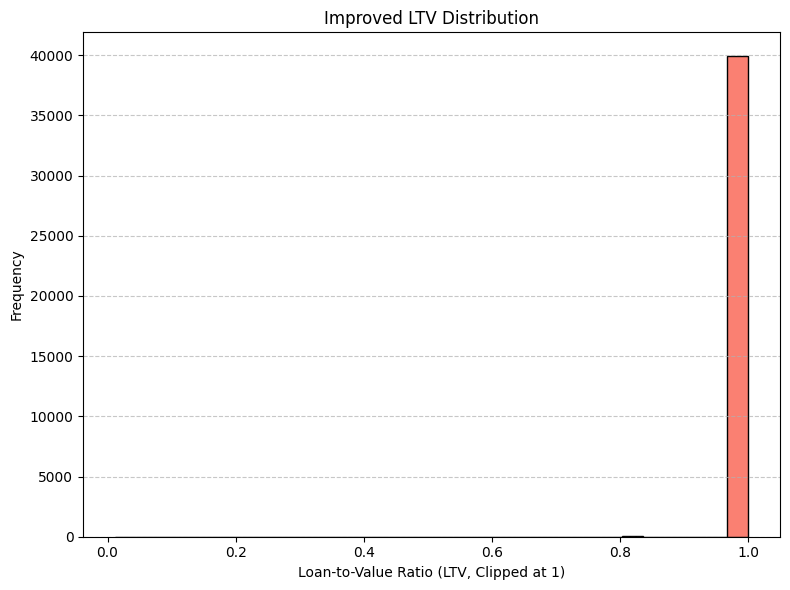

In [ ]:
# Import necessary libraries
import numpy as np

# 1. Improved DTI Distribution
plt.figure(figsize=(8, 6))
village['DTI_clipped'] = np.clip(village['DTI'], 0, 1)  # Clip values above 1
plt.hist(village['DTI_clipped'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Improved DTI Distribution')
plt.xlabel('Debt-to-Income Ratio (DTI, Clipped at 1)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Improved Disposable Income Distribution
plt.figure(figsize=(8, 6))
village['Disposable_Income_clipped'] = np.clip(village['Disposable_Income'], -50000, 50000)  # Clip extreme values
plt.hist(village['Disposable_Income_clipped'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Improved Disposable Income Distribution')
plt.xlabel('Disposable Income (Clipped)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Improved Dependent Ratio Distribution
plt.figure(figsize=(8, 6))
village['Dependent_Ratio_clipped'] = np.clip(village['Dependent_Ratio'], 0, 0.5)  # Clip values above 0.5
plt.hist(village['Dependent_Ratio_clipped'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title('Improved Dependent Ratio Distribution')
plt.xlabel('Dependent Ratio (Clipped at 0.5)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Improved LTV Distribution
plt.figure(figsize=(8, 6))
village['LTV_clipped'] = np.clip(village['LTV'], 0, 1)  # Clip values above 1
plt.hist(village['LTV_clipped'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Improved LTV Distribution')
plt.xlabel('Loan-to-Value Ratio (LTV, Clipped at 1)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
X.isnull().sum()

age                                     0
annual_income                           0
monthly_expenses                        0
old_dependents                          0
young_dependents                        0
                                       ..
loan_purpose_Training                   0
loan_purpose_Transportation Services    0
loan_purpose_Tuition Centre             0
loan_purpose_Utensil Selling            0
loan_purpose_Vocational Loans           0
Length: 1879, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer (e.g., mean strategy for numerical features)
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf.fit(X_train_imputed, y_train)  # Use X_train_imputed if you're imputing missing values

# Predict on the test data
y_pred_rf = rf.predict(X_test_imputed)  # Use X_test_imputed if you're imputing missing values


Accuracy: 0.99
Precision: 0.98
Recall: 0.99
F1-Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4127
           1       0.98      0.99      0.99      3873

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



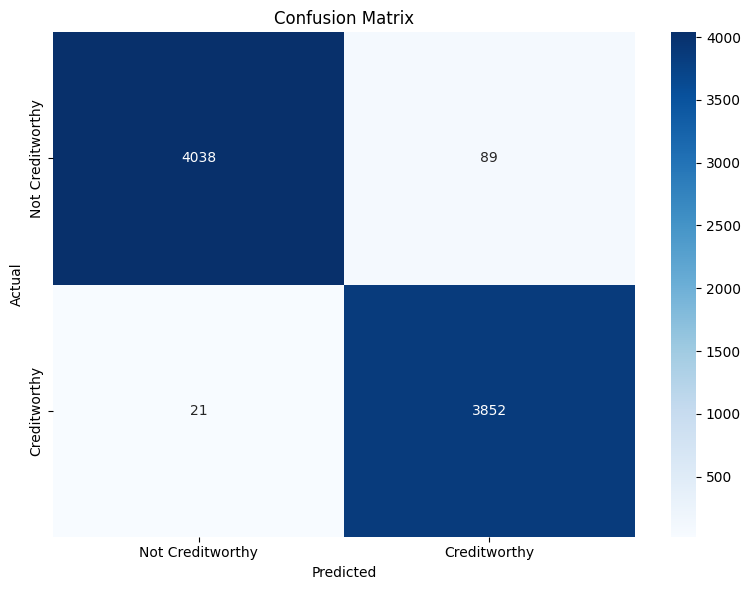

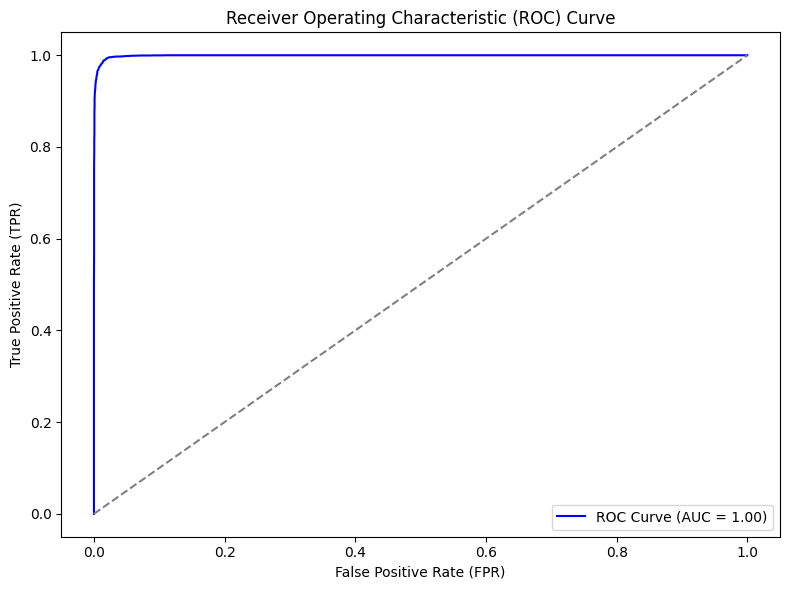

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Creditworthy', 'Creditworthy'], yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
y_pred_proba = rf.predict_proba(X_test_imputed)[:, 1]  # Get the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the training data
log_reg.fit(X_train_imputed, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test_imputed)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

# Classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.92

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4127
           1       0.90      0.94      0.92      3873

    accuracy                           0.92      8000
   macro avg       0.92      0.92      0.92      8000
weighted avg       0.92      0.92      0.92      8000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Fit the model on the training data
xgb_model.fit(X_train_imputed, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test_imputed)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

# Classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 1.00

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4127
           1       1.00      1.00      1.00      3873

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



Logistic Regression Accuracy: 0.92
Precision: 0.90
Recall: 0.94
F1-Score: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4127
           1       0.90      0.94      0.92      3873

    accuracy                           0.92      8000
   macro avg       0.92      0.92      0.92      8000
weighted avg       0.92      0.92      0.92      8000



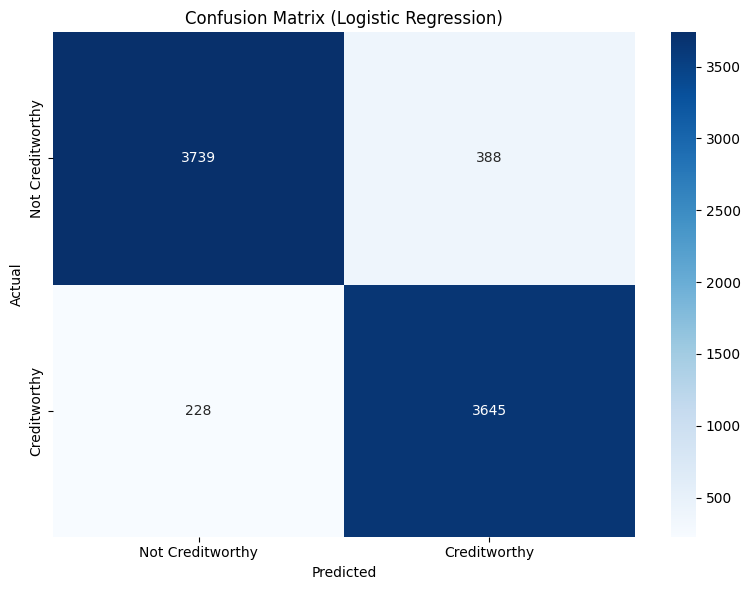

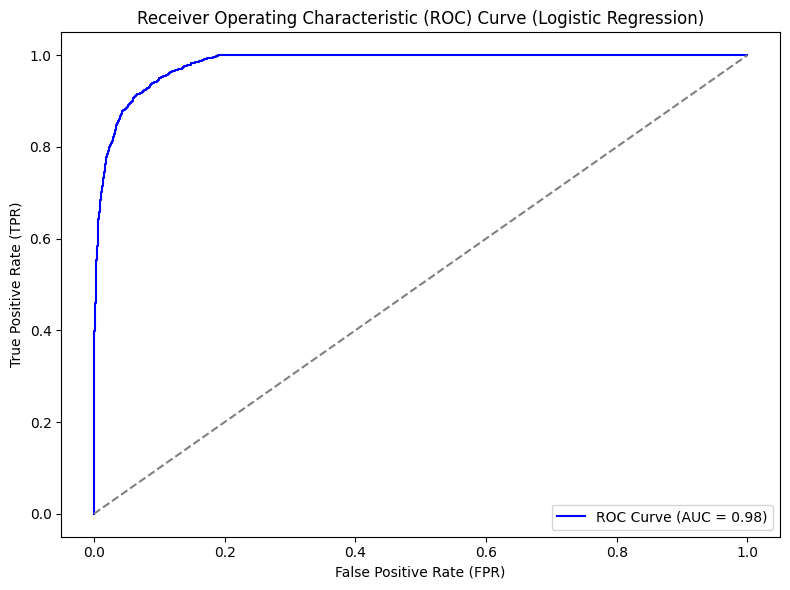

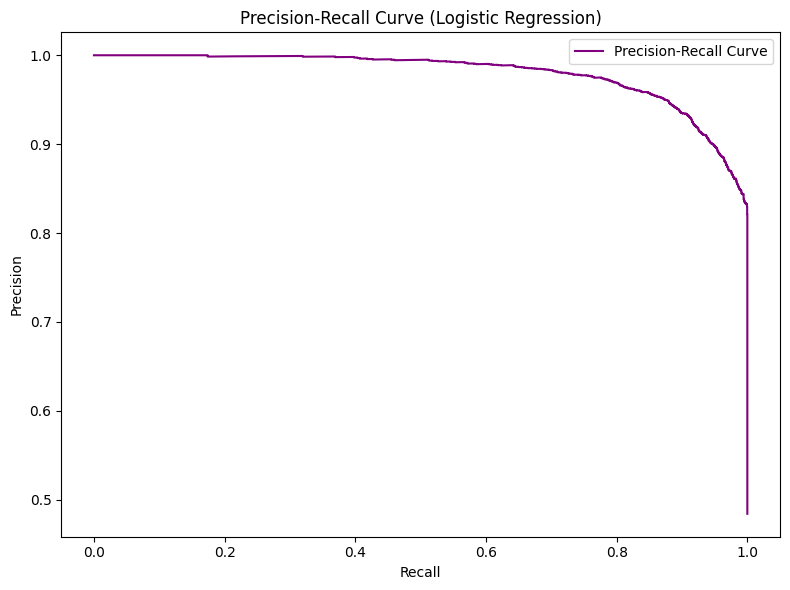

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Evaluation
# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

# Precision, Recall, F1-Score
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print(f"Precision: {precision_log_reg:.2f}")
print(f"Recall: {recall_log_reg:.2f}")
print(f"F1-Score: {f1_log_reg:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Creditworthy', 'Creditworthy'], yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
y_pred_proba_log_reg = log_reg.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba_log_reg)
roc_auc = roc_auc_score(y_test, y_pred_proba_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label='Precision-Recall Curve')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()


XGBoost Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4127
           1       1.00      1.00      1.00      3873

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



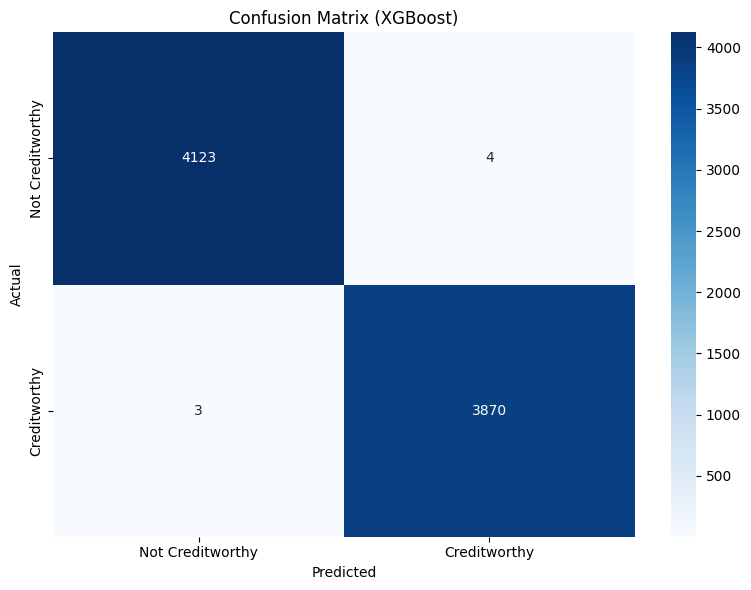

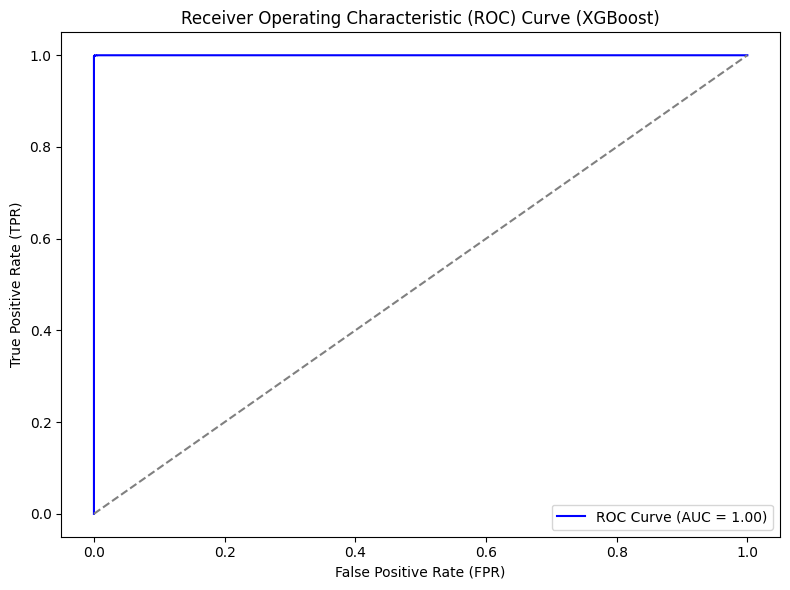

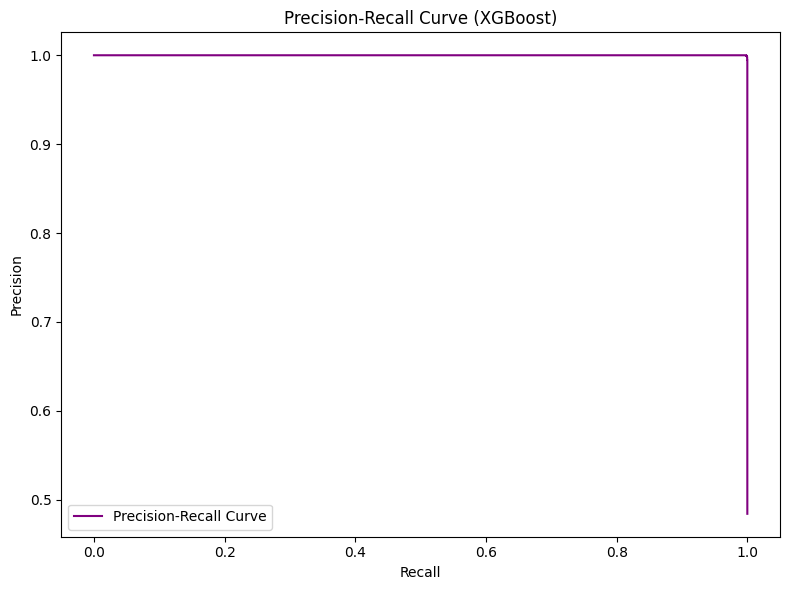

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

# Precision, Recall, and F1-Score
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1-Score: {f1_xgb:.2f}")

# Classification Report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Creditworthy', 'Creditworthy'], yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
y_pred_proba_xgb = xgb_model.predict_proba(X_test_imputed)[:, 1]
fpr_xgb, tpr_xgb, roc_thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision_xgb, recall_xgb, pr_thresholds_xgb = precision_recall_curve(y_test, y_pred_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, color='purple', label='Precision-Recall Curve')
plt.title('Precision-Recall Curve (XGBoost)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Save it to the output directory
village.to_csv('/kaggle/working/village_file_output.csv', index=False)